In [3]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
avetime = 30

Coefficients: 
 [[0.01912901]]
Coefficients: 
 [[0.01605997]]
Mean squared error: 10.83
Mov Avg mean squared error: 9.22
Variance score: -17.49
move avg Variance score: -41.50


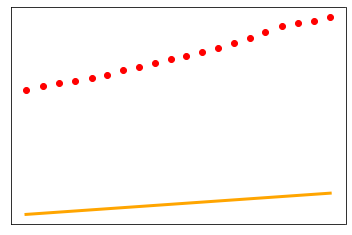

In [5]:
def moving_average(a, n=100):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n


df = pd.read_csv('data/KO.csv')
close_px = df['Adj Close']

close_px = np.asarray(df['Adj Close'])
close_px = close_px.reshape(-1, 1)
df['Date'] = df['Date'].astype('datetime64[D]')
df['Serial'] = df['Date'] - min(df['Date'])
thedate = np.asarray(df['Serial']) / np.timedelta64(1, 'D')
thedate = thedate.reshape(-1, 1)

mavg = moving_average(np.asarray(close_px), avetime)
mavg = mavg[~np.isnan(mavg)]
mavg = mavg.reshape(-1, 1)

mavg_date = moving_average(np.asarray(thedate), avetime)
mavg_date = mavg_date.reshape(-1, 1)
mavg_date_train = mavg_date[:-20]
mavg_date_test = mavg_date[-20:]

# Split the data into training/testing sets
daterange_train = thedate[:-20]
daterange_test = thedate[-20:]

# Split the targets into training/testing sets
close_px_train = close_px[:-20]
close_px_test = close_px[-20:]

mavg_train = mavg[:-20]
mavg_test = mavg[-20:]


# Create linear regression object
regr = linear_model.LinearRegression()
regrmavg = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(daterange_train, close_px_train)
regrmavg.fit(mavg_date_train, mavg_train)

# Make predictions using the testing set
close_px_pred = regr.predict(daterange_test)
mavg_pred = regrmavg.predict(mavg_date_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
print('Coefficients: \n', regrmavg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(close_px_test, close_px_pred))
print("Mov Avg mean squared error: %.2f"
      % mean_squared_error(mavg_test, mavg_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(close_px_test, close_px_pred))
print('move avg Variance score: %.2f' % r2_score(mavg_test, mavg_pred))
# Plot outputs
# plt.scatter(daterange_test, close_px_test,  color='black')
# plt.plot(daterange_test, close_px_pred, color='blue', linewidth=3)
#
# plt.xticks(())
# plt.yticks(())
#
# plt.show()

plt.scatter(mavg_date_test, mavg_test,  color='red')
plt.plot(mavg_date_test, mavg_pred, color='orange', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()